In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
 data = pd.read_csv("rotterdam_hamburg_clean_new.csv", on_bad_lines="warn")
#data.insert(0, "pastTravelTime",(pd.to_datetime(data["time"]) - pd.to_datetime(data["StartTime"])).dt.total_seconds())
data.insert(0, "longitudeDistance", data["EndLongitude"] - data["StartLongitude"])
data.insert(0, "latitudeDistance", data["EndLatitude"] - data["StartLatitude"])

test_features = [ "COG", "TH", "shiptype", "MMSI", "TripID", "EndLongitude", "EndLatitude", "pastTravelTime", "longitudeDistance", "latitudeDistance"]

y = (pd.to_datetime(data["EndTime"]) - pd.to_datetime(data["time"])).dt.total_seconds()
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


adaboost_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_regressor.fit(X_train, y_train)
y_predict = adaboost_regressor.predict(X_test)

In [12]:
mse_decision_trees = mean_absolute_error(y_test, y_predict)
print("Mean absolute Error for Decision Trees: " , mse/60)

Mean absolute Error for Decision Trees:  51.48981829302101


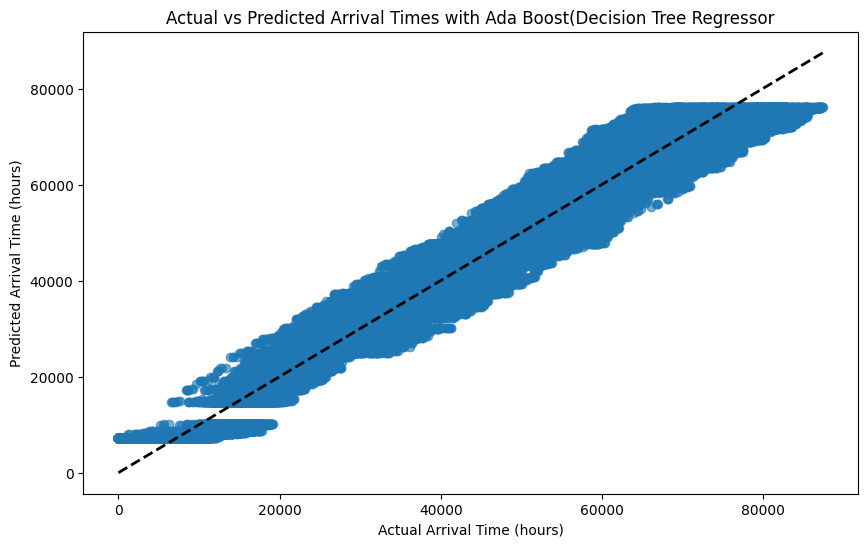

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times with Ada Boost(Decision Tree Regressor')
plt.show()

In [ ]:
base_regressor = KNeighborsRegressor(n_neighbors=1)
adaboost_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train, y_train)
y_predict_decision = adaboost_regressor.predict(X_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_decision, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times with Ada Boost(KNN Regressor)')
plt.show()

## Adaboost with Linear SVR
From the documentation, datasets with more than 10000 samples are not suitable for SVR instead Nystroem and Linear SVG were recommended.

In [ ]:
base_regressor = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5, max_iter=10000, dual='auto'))
adaboost_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train, y_train)
y_predict = adaboost_regressor.predict(X_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times with Ada Boost(Linear SVR)')
plt.show()

## Adaboost with Linear Regression

In [6]:
base_regressor = linear_model.LinearRegression()
adaboost_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train, y_train)
y_predict_linear = adaboost_regressor.predict(X_test)

In [1]:
mse_linear_regression = mean_absolute_error(y_test, y_predict)
print("Mean absolute Error for Boosted Linear Regression: " , mse/60)

NameError: name 'mean_absolute_error' is not defined

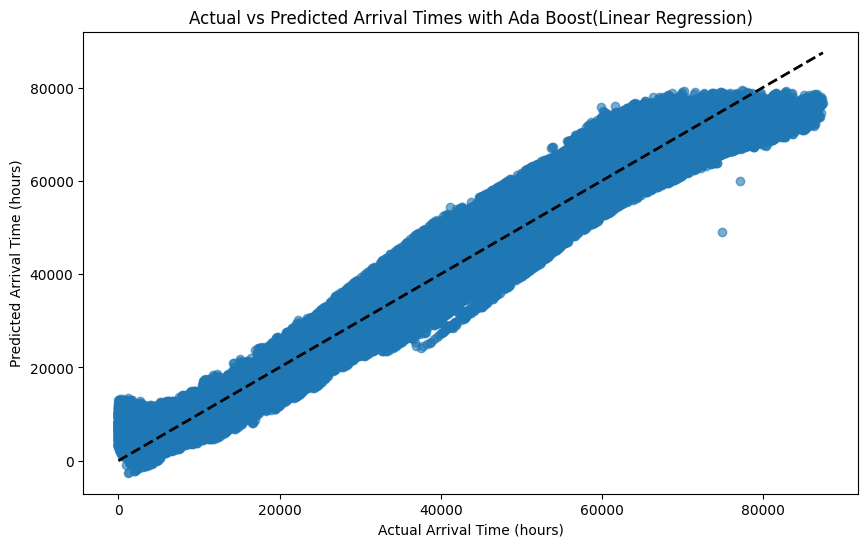

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times with Ada Boost(Linear Regression)')
plt.show()

## AdaBoost with Extra trees

In [ ]:
base_regressor = ExtraTreesRegressor(n_estimators=100, random_state=0, n_jobs = -1)
adaboost_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train, y_train)
y_predict_extra = adaboost_regressor.predict(X_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_extra, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times with Ada Boost(Extra Trees Regression)')
plt.show()

In [ ]:
mse_linear_extra_trees = mean_absolute_error(y_test, y_predict)
print("Mean absolute Error for Extra Trees: " , mse/60)